# P411 - Assignment 2
Kristi Webb, Sept 18 2015

github k-a-webb

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import matplotlib.cm as cm # import the colormaps.


In [22]:
def linear(x, a, n):
    return a*x+n
    
def corr_coeff(x,y): 
    return np.sum((x - np.mean(x))*(y - np.mean(y)))/(np.std(x)*np.std(y)*(len(x)-1))

def samp_std_2(x,y):
    N = len(x)
    b = ( np.sum(x*y) - N*np.mean(x)*np.mean(y) )/( np.sum(x**2) - N*np.mean(x)**2 )
    a = np.mean(y) - b*np.mean(x)
    yhat = b*x + a
    return a, b, np.sqrt(np.sum((y - yhat)**2)/(N-2))

def samp_std(x, y, a, n):
    # If y given x is Normally distributed
    return np.sqrt( np.sum( (x*a - linear(x, a, n))**2 ) / (len(x) - 2) )

def mean_slope(x,y):
    return np.sum( (y - np.mean(y))*x )/np.sum( (x - np.mean(x))*x ) 

<font color='blue'>
## Is it necessary to subtract the mean ??

# Q1: Show that the correlation co-efficient is indeed related to the fraction of varaince explained by a linear dependence.¶

**1** To start, make a $N(0,1)$ random variable $x$, with 200,000 entries.  Then make a linearly dependent variable $y_i= a x_i + n_i$, where a is some amplitude, and $n_i$ is a random noise varaible.  Assume that $n_i$ is distributed as $N(0,n)$, where $n$ is the noise level.

Calculate the correlation co-efficient $r_{xy}$ between $x$ and $y$ for 40 different values of $n$, logarithmically spaced between 0.01 and 100. (hint use `np.logspace`).  

Plot $r_{xy}$ versus the inverse of the noise $n$ normalized by the standard devaition of the signal $ax_i$: $\frac{a s_x}{n}$   You may want to use `ax.loglog` to visualize the orders of magnitude.  

Comment on the resulting comparison.

In [ ]:
N = 200000
amplitude=[25., 50., 100.]

x = np.random.randn(N, 1)
n = np.logspace(-2,2,num=40)

fig,ax=plt.subplots(1,1)

for a in amplitude:
    
    r_xy = np.zeros_like(n)
    for ii, nn in enumerate(n):
        y = linear(x, a, np.random.randn(N)*nn)        
        r_xy[ii] = corr_coeff(x, y)
        
    ax.loglog(a*np.std(x)/n_r, r_xy, label='amp = {}'.format(a))

ax.set_title(r'Correlation coefficient of $x_i=N(0,1)$ with $y_i = a*x_i + N(0,n)$')
ax.set_xlabel(r'amplitude * $s_x$/$n_r$')
ax.set_ylabel(r'$r_{xy}$')

plt.legend()
plt.show()    

<font color='red'>
## Comment on the resulting comparison.

<hr>
**2** Repeat the above, but with a different value of $a$.  Comment on how (and why) $a$ changes the value of $r_{xy}$. 
<hr>

<font color='red'>
## Comment on how (and why) $a$ changes the value of $r_{xy}$. 

<hr>
## Q2: Monte Carlo on slopes and test versus student-t distribution

**1** We stated without proof that the slope $b$ of a linear fit of $y$ to $x$ is distributed as a student-t distribution with $N-2$ degrees of freedom, with a standard devaition given by the standard deviation of $y$ around the fit model $\tilde{y}$.   Lets test that emperically using a Monte Carlo technique.  

First create an independet variable $x$ from 10 points from an $N(0,1)$ distribution.

Next, using $n=1.0$, and $a=1.0$ create the dependent variables $y_i=a x_i + n_i$ where $n_i$ are drawn from the $N(0,n)$ distribution.  Calculate the slope $b$.  

Do this 10000 times, and make a histogram of the resulting fits $b$.  Also histogram $s_{y|x}$ as defined in the notes.

Comment on the histigrams
<hr>

In [23]:
N=10.
NN=10000
n=1.
a=1.

b_arr = np.zeros(NN)
s_yx = np.zeros(NN)

for i in np.arange(NN):
    x = np.random.randn(N)
    y = linear(x, a, np.random.randn(N)*n)
    
    m, b, r, p, s = stats.linregress(x,y)
    m = mean_slope(x,y)
    b_arr[i] = m
    # s_yx[i] = samp_std(x,y,a,n)
    a, b, s_yx[i] = samp_std_2(x,y)


/Users/kawebb/venv/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kawebb/venv/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


/Users/kawebb/venv/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


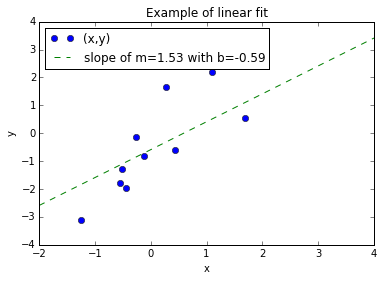

In [8]:
plt.plot(x,y,'o',label='(x,y)')
plt.plot(range(-2,5), m*range(-2,5)+b, '--g', label="slope of m=%1.2f with b=%1.2f"%(m,b))
plt.legend(loc=0)
plt.xlabel('x');plt.ylabel('y');plt.title('Example of linear fit')
plt.show()

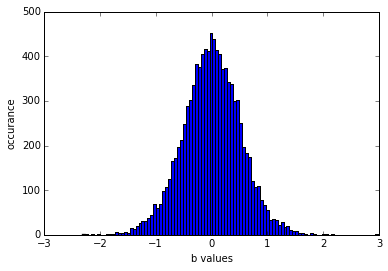

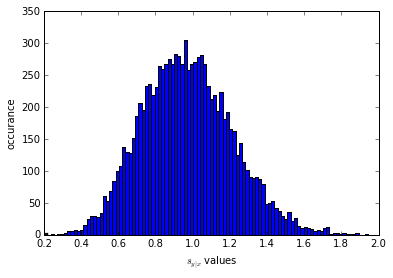

In [25]:
plt.hist(b_arr, bins=100)
plt.xlabel('b values')
plt.ylabel('occurance')
plt.show()

plt.hist(s_yx, bins=100) # range=[s_yx[0],s_yx[-1]]
plt.xlabel(r'$s_{y|x}$ values')
plt.ylabel('occurance')
plt.show()

<font color='red'>
## Comment on the histograms

<hr>
**2** Assuming $s_{y|x}=1.$ (which is the same as our value of $n$), plot the student-t probability density function on the histogram of b and show that they compare favorably (if they don't you might need to check your work!)
<hr>

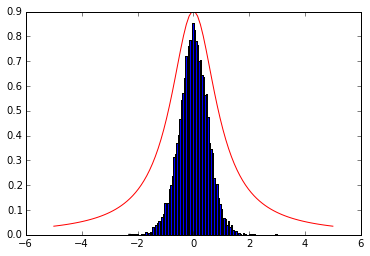

In [41]:
x = np.linspace(-5, 5, 100)
plt.hist(b_arr-np.mean(b_arr), bins=100, normed=True)
st_pdf = stats.t.pdf(x, 1,)
plt.plot(x, st_pdf/np.max(st_pdf)*0.9, '-r')
plt.show()

<font color='red'>
## show that they compare favorably

<hr>
**3** Do the same procedure for a different number of data points, and a different value for the noise level $n$.  Remember to scale your theoretical histogram by the new expected value of $s_{y|x}$.
<hr>

In [42]:
N=100.
NN=10000
n=1.
a=1.

b_arr = np.zeros(NN)
s_yx = np.zeros(NN)

for i in np.arange(NN):
    x = np.random.randn(N)
    y = linear(x, a, np.random.randn(N)*n)
    
    m, b, r, p, s = stats.linregress(x,y)
    m = mean_slope(x,y)
    b_arr[i] = m
    # s_yx[i] = samp_std(x,y,a,n)
    a, b, s_yx[i] = samp_std_2(x,y)

/Users/kawebb/venv/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kawebb/venv/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


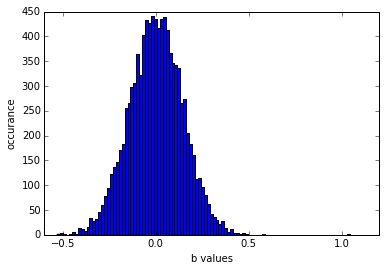

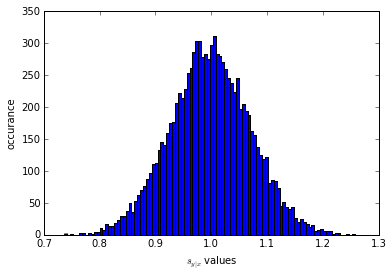

In [43]:
plt.hist(b_arr, bins=100)
plt.xlabel('b values')
plt.ylabel('occurance')
plt.show()

plt.hist(s_yx, bins=100) # range=[s_yx[0],s_yx[-1]]
plt.xlabel(r'$s_{y|x}$ values')
plt.ylabel('occurance')
plt.show()

## Q3: Linear comparison of Deep Cove data to James Bay temperature data

Data was collected from a number of weather stations by the Victoria Weather Network.  In the file below is hourly temperature data (in degrees Celsius) and we will consider two of the stations in that file:

In [44]:
hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb = hourdata[1,:]
dcc = dc[np.isfinite(dc+jb)]
jb = jb[np.isfinite(dc+jb)]
dc=dcc

<hr>
**1** Make a scatterplot of James Bay versus Deep Cove.
<hr>

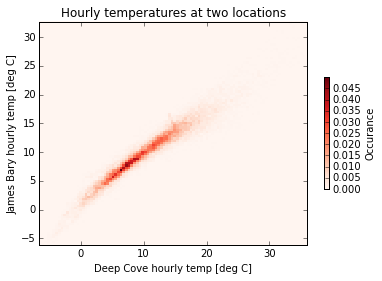

In [51]:
fig,ax=plt.subplots(1,1)

(n,xx,yy,im)=ax.hist2d(dc, jb, bins=100, cmap=cm.Reds, cmin=0., normed=True)

plt.colorbar(im, shrink=0.5, label='Occurance')
ax.set_xlabel('Deep Cove hourly temp [deg C]')
ax.set_ylabel('James Bary hourly temp [deg C]')
ax.set_title('Hourly temperatures at two locations')

<hr>
**2** Compute the linear Correlation Co-efficient (without a canned routine)
<hr>

In [82]:
r = corr_coeff(dc,jb)
print "Correlation coefficient: {}".format(r)

Correlation coefficient: 0.965414194534


<hr>
**3** Fit a straight line to the James Bay data as a fucntion of the Deep Cove data, and add to the scatter plot made above.  Comment on the fit.
<hr>

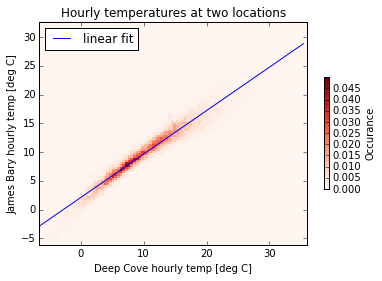

In [86]:
m, b, rr, p, s = stats.linregress(dc, jb)

fig,ax=plt.subplots(1,1)

(n,xx,yy,im)=ax.hist2d(dc, jb, bins=100, cmap=cm.Reds, cmin=0., normed=True)

x = np.arange(np.min(dc), np.max(dc))
ax.plot(x, m*x+b, label="linear fit")

plt.colorbar(im, shrink=0.5, label='Occurance')
ax.set_xlabel('Deep Cove hourly temp [deg C]')
ax.set_ylabel('James Bary hourly temp [deg C]')
ax.set_title('Hourly temperatures at two locations')
plt.legend(loc=0)

<font color='red'>
## Comment on the fit.

<hr>
**4** Add the confidence intervals to your fit, and comment.
<hr>

Slope b is between 0.753758 and 0.759143 with 95% probability


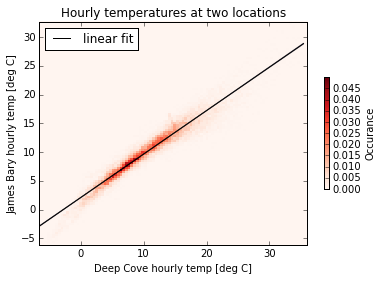

In [87]:
a, b2, s_yx = samp_std_2(dc, jb)
bdn, bup = stats.t.interval(0.95,df=N-2,scale=s_yx)

bb=np.array([bdn,bup]) / np.sqrt(np.sum((dc - np.mean(dc))**2))
print 'Slope b is between %f and %f with 95%% probability'%(b2+bb[0],b2+bb[1])
yhathigh = (b2+bb[1])*(x - np.mean(dc)) + np.mean(jb)
yhatlow = (b2+bb[0])*(x - np.mean(dc)) + np.mean(jb)

fig,ax=plt.subplots(1,1)

(n,xx,yy,im) = ax.hist2d(dc, jb, bins=100, cmap=cm.Reds, cmin=0., normed=True)
ax.plot(x, m*x+b, '-k', label="linear fit")
ax.fill_between(x, yhathigh, yhatlow, alpha=0.4, label="confidence")
#ax.plot(x, yhathigh, ":", label="linear fit")
#ax.plot(x, yhatlow, ":", label="linear fit")

plt.colorbar(im, shrink=0.5, label='Occurance')
ax.set_xlabel('Deep Cove hourly temp [deg C]')
ax.set_ylabel('James Bary hourly temp [deg C]')
ax.set_title('Hourly temperatures at two locations')
plt.legend(loc=0)
plt.show()


<font color='red'>
## Comment

<hr>
**5** Note that we have assumed that the Deep Cove data is independent and that the James Bay data is dependent.  There is no reason to assume this!  Do the fit in the other direction, and compare the slopes.
<hr>

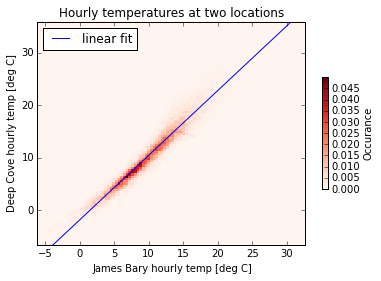

In [84]:
m_2, b_2, rr_2, p_2, s_2 = stats.linregress(jb, dc)

fig, ax = plt.subplots(1,1)

(n_2,xx_2,yy_2,im_2)=ax.hist2d(jb, dc, bins=100, cmap=cm.Reds, cmin=0., normed=True)

x_2 = np.arange(np.min(jb), np.max(jb))
ax.plot(x_2, m_2*x_2+b_2, label="linear fit")

plt.colorbar(im_2, shrink=0.5, label='Occurance')
ax.set_ylabel('Deep Cove hourly temp [deg C]')
ax.set_xlabel('James Bary hourly temp [deg C]')
ax.set_title('Hourly temperatures at two locations')
plt.legend(loc=0)

<font color='red'>
## Compare the slopes

**NOTE** There is a way to treat both axes independently called "Neutral Regression".  It is relatively simple, and involves normalizing the total distance of each point from the trend line. <a href="http://journals.ametsoc.org/doi/pdf/10.1175/1520-0426(1999)016%3C0876%3AAPFANR%3E2.0.CO%3B2">(Marsden 1999)</a>. This technique is strongly preferred if there is no reason to think that one data set is dependent on the other.  A caveat is that the data sets shoudl be normalized before fitting so that the "distance" has meaning.  

In [91]:
print 'Slope of James Bay as function of Deep Cove: {}'.format(m)
print 'Slope of Deep Cove as function of James Bay: {}'.format(m_2)

print 'Inverse of Slope of Deep Cove as function of James Bay: {}'.format(1/m_2)

Slope of James Bay as function of Deep Cove: 0.756450182363
Slope of Deep Cove as function of James Bay: 1.23199449359
Inverse of Slope of Deep Cove as function of James Bay: 0.811691939535
